In [1]:
#EDA packages
import pandas as pd 
import numpy as np

In [2]:
import os
from scipy.stats import randint
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
#Data Viz packages
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("complaints.csv", low_memory=False)

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-03-18,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with customer service,NaN,NaN,AMERICAN EXPRESS COMPANY,CA,95032,NaN,NaN,Web,2023-04-14,In progress,Yes,NaN,6708957
1,2023-04-27,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,19111,NaN,NaN,Web,2023-04-27,In progress,Yes,NaN,6896030


In [8]:
df.shape

(3586489, 18)

In [12]:
df.head(2).T

,0,1
Date received,2023-03-18,2023-04-27
Product,Credit card or prepaid card,"Credit reporting, credit repair services, or o..."
Sub-product,General-purpose credit card or charge card,Credit reporting
Issue,"Other features, terms, or problems",Problem with a credit reporting company's inve...
Sub-issue,Problem with customer service,Their investigation did not fix an error on yo...
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,AMERICAN EXPRESS COMPANY,"EQUIFAX, INC."
State,CA,PA
ZIP code,95032,19111


In [13]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(1294168, 2)

In [14]:
df1.head(15)

,Product,Consumer_complaint
21,Student loan,I recently submitted a complaint about how my ...
22,Debt collection,XXXX XXXX XXXX ( XXXX ) is engaged in 1. bad-f...
25,Debt collection,I have disputed this item with the credit repo...
33,"Credit reporting, credit repair services, or o...",Hard inquiries are on my credit report that I ...
34,"Money transfer, virtual currency, or money ser...",On XX/XX/2022 I was searching for a specific f...
44,"Credit reporting, credit repair services, or o...",I have several accounts reporting on my credit...
45,Debt collection,"This complaint is for Rock Creek Capital , LLC..."
51,"Credit reporting, credit repair services, or o...",On several occasions I tried challenging some ...
52,"Credit reporting, credit repair services, or o...",This complaint to Experian was the result of t...
55,Vehicle loan or lease,Im currently XXXX XXXX military and informed...


In [15]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

36.1

In [16]:
df2 = df1.sample(10000, random_state=1).copy()

In [20]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [32]:
a=df2.loc[df2['Product'].isin(['Credit reporting, repair, or other','Debt collection','Consumer Loan','Mortgage'])]
pd.DataFrame(a.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Mortgage
2,Debt collection
3,Consumer Loan


In [33]:
# Create a new column 'category_id' with encoded categories 
a['category_id'] = a['Product'].factorize()[0]
category_id_df = a[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
a.head()

C:\Users\gupta\AppData\Local\Temp\ipykernel_552\1700392438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['category_id'] = a['Product'].factorize()[0]


,Product,Consumer_complaint,category_id
1353433,"Credit reporting, repair, or other",I requested to have the XXXX XXXX Bank trade r...,0
2081416,"Credit reporting, repair, or other",XXXX XXXX sent a letter stating they would cor...,0
1954570,Mortgage,Essentially I was verbally told I would have p...,1
1331941,Debt collection,Citizens banks claims The debt of XXXX from 20...,2
3111660,"Credit reporting, repair, or other",In accordance with the FAIR CREDIT REPORTING A...,0


<Axes: title={'center': 'Complaints'}, ylabel='Product'>

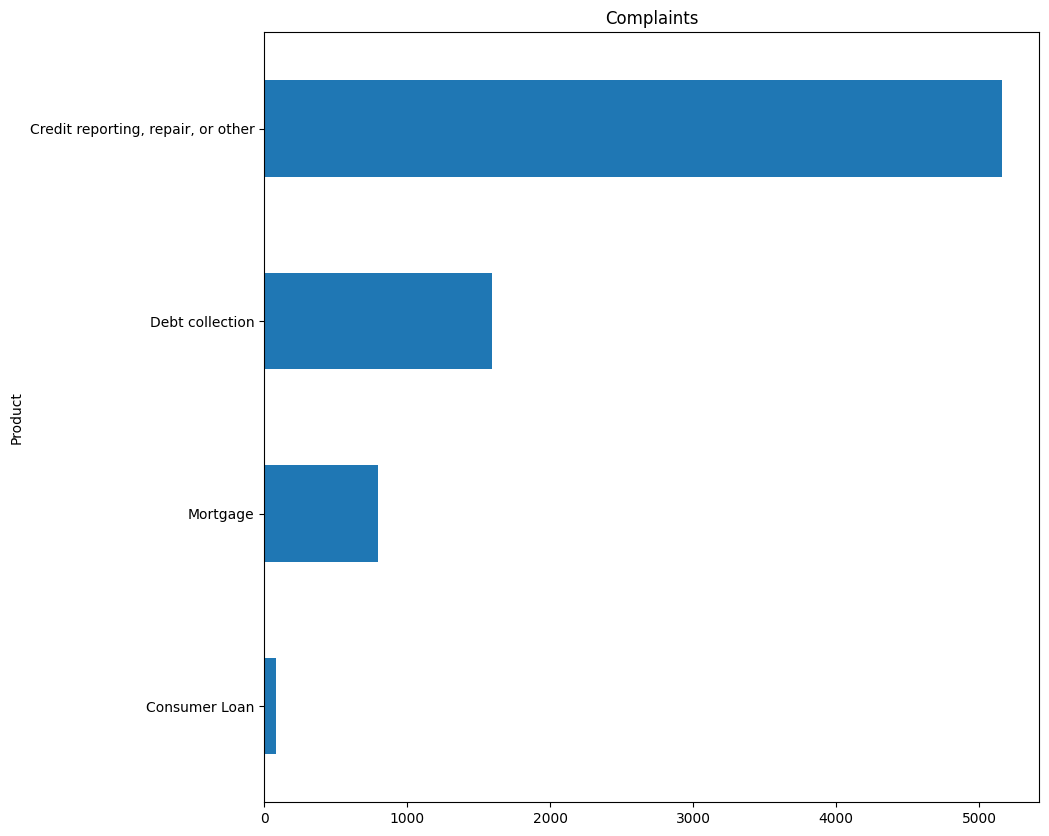

In [36]:
fig = plt.figure(figsize=(10,10))
a.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(ylim=0, title= 'Complaints')

<Axes: title={'center': 'Complaints'}, ylabel='Product'>

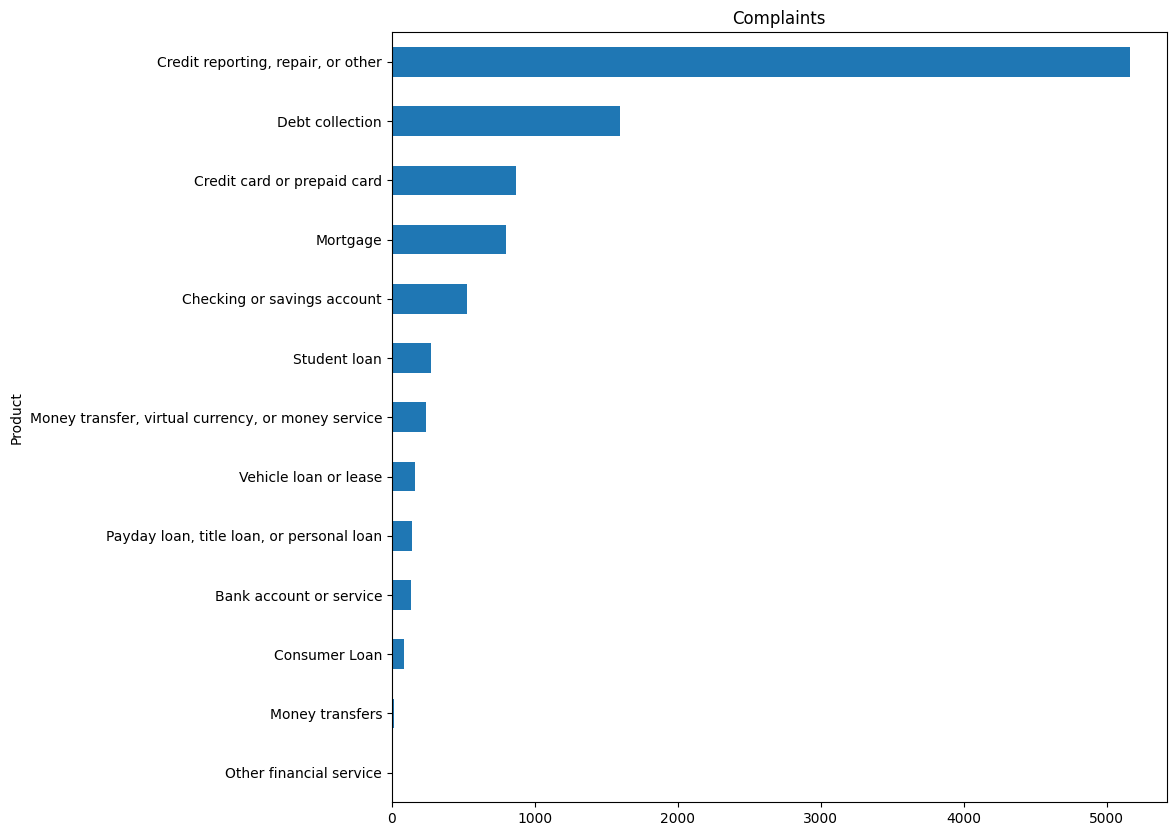

In [39]:
fig = plt.figure(figsize=(10,10))
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(ylim=0, title= 'Complaints')

In [40]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2), stop_words='english')

# transform each complaint into a vector
features = tfidf.fit_transform(a.Consumer_complaint).toarray()

labels = a.category_id

print("Each of the %d complaints is represented by %d features " %(features.shape)) #TF-IDF score of unigrams and bigrams

Each of the 7642 complaints is represented by 19772 features (TF-IDF score of unigrams and bigrams)


In [48]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Consumer Loan:
  * Most Correlated Unigrams are: car, westlake, santander
  * Most Correlated Bigrams are: westlake financial, santander consumer, finance company

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: collect, mortgage, debt
  * Most Correlated Bigrams are: collect debt, 15 1681, 1681 section

==> Debt collection:
  * Most Correlated Unigrams are: collection, collect, debt
  * Most Correlated Bigrams are: debt collection, collection agency, collect debt

==> Mortgage:
  * Most Correlated Unigrams are: modification, escrow, mortgage
  * Most Correlated Bigrams are: escrow account, mortgage company, loan modification


In [49]:
X = a['Consumer_complaint'] # Complaints
y = a['Product'] # The labels 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [50]:
# Models:

models = [LinearSVC(), MultinomialNB(),]

# 2 Cross-validation
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [51]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [52]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.889950,0.010918
MultinomialNB,0.786574,0.008328


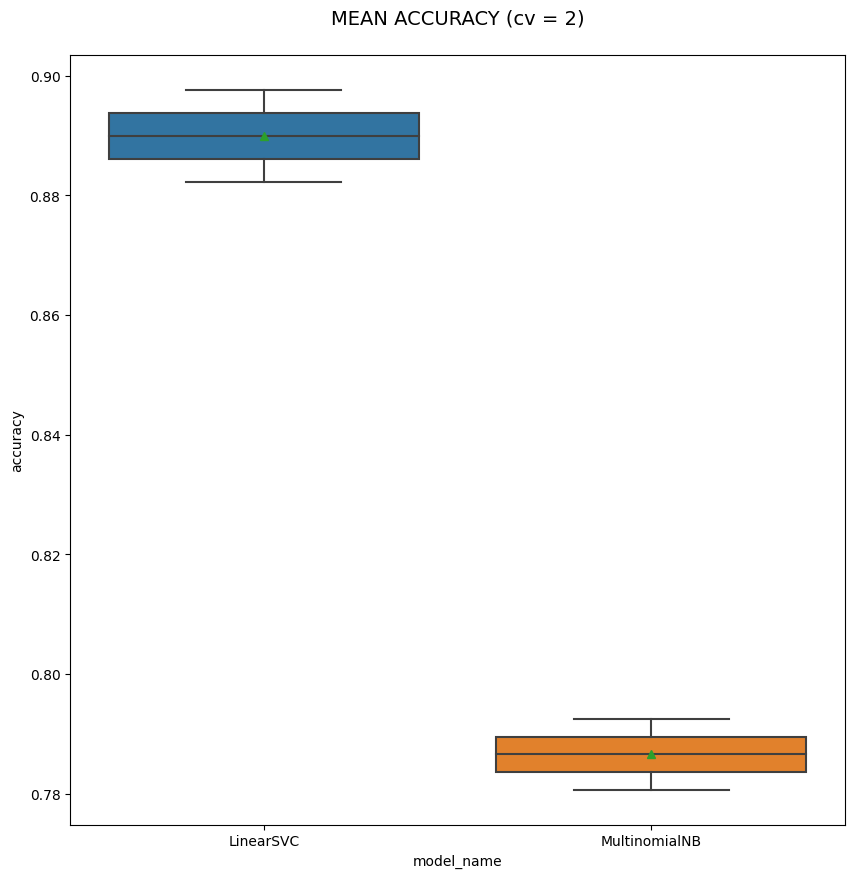

In [56]:
#Box plot are the best to plot the entire dataset, for mean, standard deviation
plt.figure(figsize=(10,10))
sns.boxplot(x='model_name', y='accuracy',data=cv_df,showmeans=True)
plt.title("MEAN ACCURACY (cv = 2)\n", size=14);

In [57]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,labels, a.index, test_size=0.25,random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
# Classification report
print('Metrics (Accuracy)')
print(metrics.classification_report(y_test, y_pred, target_names= a['Product'].unique()))

Metrics (Accuracy)
                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.93      0.95      0.94      1304
                          Mortgage       0.92      0.91      0.91       215
                   Debt collection       0.82      0.78      0.80       379
                     Consumer Loan       0.50      0.08      0.13        13

                          accuracy                           0.91      1911
                         macro avg       0.79      0.68      0.70      1911
                      weighted avg       0.90      0.91      0.90      1911



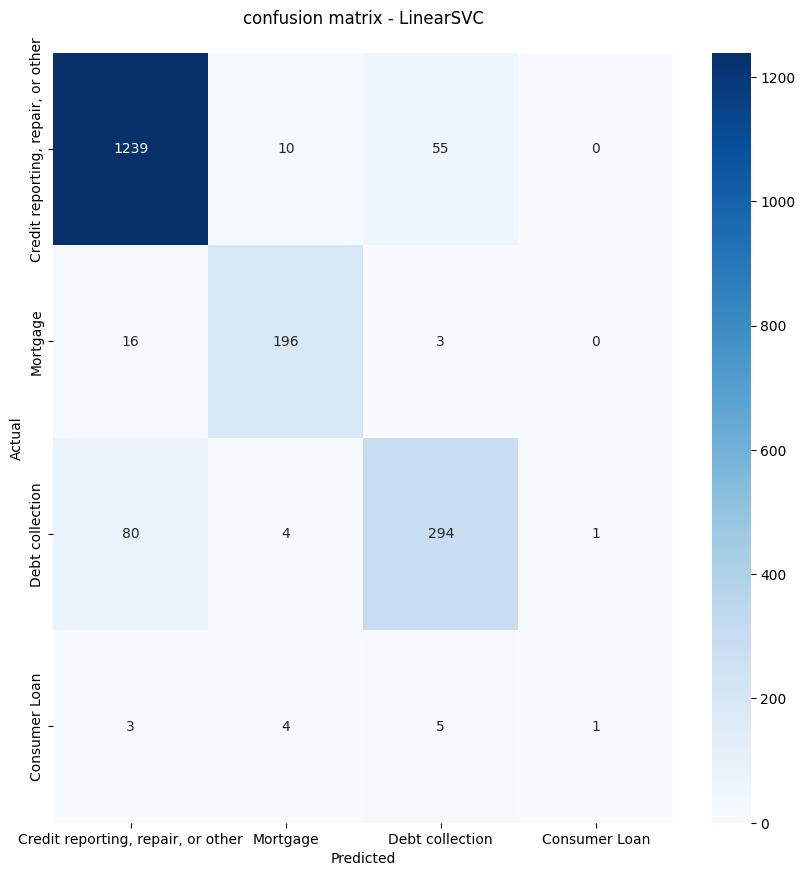

In [61]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("confusion matrix - LinearSVC\n", size=12);

In [62]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Consumer Loan':
  * Top unigrams: loan, vehicle, santander, car
  * Top bigrams: santander consumer, finance company, financial services, westlake financial

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, report, transunion, experian
  * Top bigrams: xxxx xxxx, loan company, xxxx equifax, xxxx xx

==> 'Debt collection':
  * Top unigrams: debt, collection, calling, collections
  * Top bigrams: credit services, trying collect, account credit, filing dispute

==> 'Mortgage':
  * Top unigrams: mortgage, escrow, servicing, ditech
  * Top bigrams: pay mortgage, late fees, loan servicing, loan modification


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0) #no random data splitting  
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [66]:
complaint = """HDCC Bank is charging heavyily on credit cards."""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Credit reporting, repair, or other']


In [68]:
complaint = """I have a huge two mortgages on my home and bank is asking me to take another one or rather forcing me to do so"""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Mortgage']
